# Linear Regression from Scratch
The steps we will follow are:
1. Generate a dataset with some random noise
2. Use sklearn linear regression as benchmark
3. Implement linear regression from scratch and compare

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
seed = 7
np.random.seed(seed)

### Generate a dataset with random noise

In [218]:
from sklearn.datasets.samples_generator import make_regression
x,y = make_regression(n_samples = 200, n_features= 1, n_informative=1, random_state=0, noise=30)
print('x shape = ', x.shape, 'y shape = ', y.shape)

x shape =  (200, 1) y shape =  (200,)


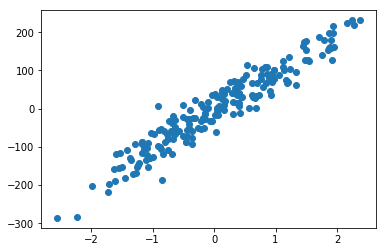

In [219]:
plt.scatter(x,y)

In [220]:
def get_rmse(y, yhat):
    return np.sqrt(np.sum(np.square(y-yhat)))

### Benchmark with sklearn Linear Regression

In [221]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression(fit_intercept = True)
lin_reg.fit(x,y)
print(lin_reg.coef_)
print(lin_reg.intercept_)
pred_y = lin_reg.predict(x)
print(get_mse(y,pred_y))

[97.00739564]
-4.188203055010986
416.8569923703271


### Gradient Descent 

In [222]:
def gradient_descent(learning_rate, x, y, max_iter = 100):
    convergence = False
    counter = 0
    m = len(x)
    
    theta0 = np.random.rand(1)
    theta1 = np.random.rand(x.shape[1])
    
    J = np.sum(np.square(np.matmul(x,theta1) + theta0 - y))
    #print(J)
    #print(J.shape)
    
    while not convergence:
        grad0 = 1.0/m*np.sum((np.matmul(x,theta1) + theta0 - y))
        grad1 = 1.0/m*np.sum(np.matmul((np.matmul(x,theta1) + theta0 - y),x))
        
        #print(grad0.shape, '  ', grad1.shape)
        
        theta0 = theta0 - learning_rate*grad0
        theta1 = theta1 - learning_rate*grad1
        
        error = np.sum(np.square(np.matmul(x,theta1) + theta0 - y))
        #print(error)
        
        if ((abs(J-error) < 0.001) or (counter == max_iter)):
            convergence = True
        
        counter += 1
        
        J = error
        
    return theta0, theta1

In [223]:
learning_rate = 0.01

In [224]:
theta0, theta1 = gradient_descent(learning_rate, x, y, max_iter=1000)

In [225]:
print(theta0, theta1)

[-4.1787913] [96.99419769]


In [226]:
print(get_mse(y, theta0+np.matmul(x,theta1)))

416.8570531992683


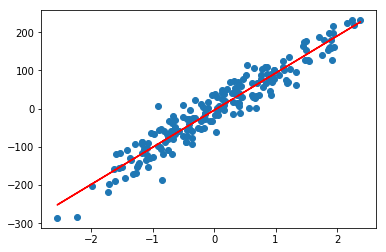

In [227]:
plt.scatter(x,y)
plt.plot(x, theta0+x*theta1, 'r')
plt.show()